# Population Data from CSV

This notebooks reads sample population data from `data/atlantis.csv` and plots it using Matplotlib. Edit `data/atlantis.csv` and re-run this cell to see how the plots change!

In [3]:
from hiive.mdptoolbox import mdp,example
from hiive import mdptoolbox
from gym.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt


generate_random_map()
print(generate_random_map())


P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()



['SFFHFFFF', 'HFFFFHFF', 'FFFFFHFF', 'FFFFFFFF', 'FFFHHFFH', 'FFFFFFFH', 'FFFHHFHF', 'FFFFFFFG']


[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 1.9073486328125e-05,
  'Max V': 4.0,
  'Mean V': 1.6666666666666667,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.24,
  'Error': 3.24,
  'Time': 5.1975250244140625e-05,
  'Max V': 7.24,
  'Mean V': 3.7633333333333336,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.9373,
  'Error': 2.6973000000000003,
  'Time': 7.915496826171875e-05,
  'Max V': 9.9373,
  'Mean V': 6.190633333333333,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 12.291970000000001,
  'Error': 2.3546700000000005,
  'Time': 9.822845458984375e-05,
  'Max V': 12.291970000000001,
  'Mean V': 8.545303333333335,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 14.411173000000002,
  'Error': 2.1192030000000006,
  'Time': 0.00011706352233886719,
  'Max V': 14.411173000000002,
  'Mean V': 10.664506333333334,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 1

In [5]:
from hiive.mdptoolbox import mdp,example
from hiive import mdptoolbox
from gym.envs.toy_text.frozen_lake import generate_random_map
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
random_map = generate_random_map(size=4, p=0.80)
env = mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", desc=random_map, render=True)
P = env.P
R = env.R
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()



SFFH
FFHF
FFFF
FFFG


[{'State': None,
  'Action': None,
  'Reward': 0.3333333333333333,
  'Error': 0.3333333333333333,
  'Time': 2.193450927734375e-05,
  'Max V': 0.3333333333333333,
  'Mean V': 0.041666666666666664,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.4333333333333333,
  'Error': 0.19999999999999998,
  'Time': 5.1975250244140625e-05,
  'Max V': 0.4333333333333333,
  'Mean V': 0.07916666666666666,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.5233333333333333,
  'Error': 0.09000000000000002,
  'Time': 7.796287536621094e-05,
  'Max V': 0.5233333333333333,
  'Mean V': 0.10916666666666666,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.5683333333333332,
  'Error': 0.08099999999999996,
  'Time': 9.894371032714844e-05,
  'Max V': 0.5683333333333332,
  'Mean V': 0.13560416666666664,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.6061333333333332,
  'Error': 0.0567,
  'Time': 0.00011897087097167969,
  'Max V': 0.606133

In [6]:
def plot_data(gamma_arr, iters, xlabel="Gammas", ylabel="iteration", title="forest management"):
    ax = plt.axes()
    ax.set_facecolor("orange")
    plt.plot(gamma_arr,iters)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.grid()
    plt.savefig("outputs/" + title)
    plt.show()



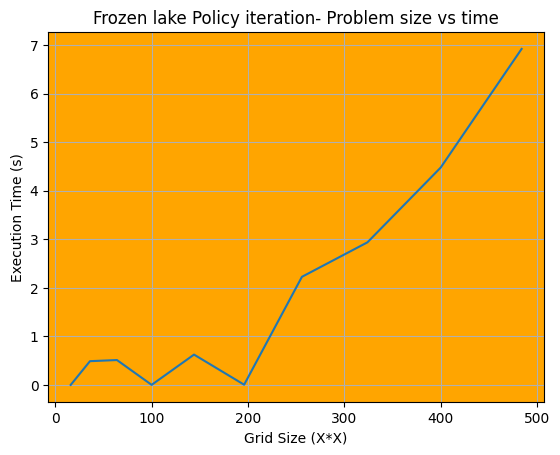

In [7]:
### value iteration

random_map = generate_random_map(size=10, p=0.80)

env = mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", desc=random_map, render=False)
final_env = env

P = env.P
R = env.R



value_f = [0]*10
policy = [0]*10
iters = [0]*10
time_array = [0]*10
gamma_arr = [0] * 10
for i in range(0, 10):
    problem_size = (i + 2)  *2


    random_map = generate_random_map(size=problem_size, p=0.80)
    env = mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", desc=random_map, render=False)
    P = env.P
    R = env.R

    pi = mdptoolbox.mdp.PolicyIteration(P, R, (9.5)/10)
    pi.run()
    gamma_arr[i]=problem_size*problem_size
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time

plot_data(gamma_arr, time_array, xlabel='Grid Size (X*X)', title='Frozen lake Policy iteration- Problem size vs time',
          ylabel='Execution Time (s)')

In [8]:
random_map = generate_random_map(size=10, p=0.60)
env = mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", desc=random_map, render=False)
P = env.P
R = env.R



value_f = [0]*10
policy = [0]*10
iters = [0]*10
time_array = [0]*10
gamma_arr = [0] * 10
for i in range(0,10):
    pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.5)/10, max_iter=20)
    pi.run()
    value_f[i] = np.mean(pi.V)
    gamma_arr[i]=(i+0.5)/10
    time_array[i] = pi.time
    policy[i] = pi.policy
    iters[i] = pi.iter




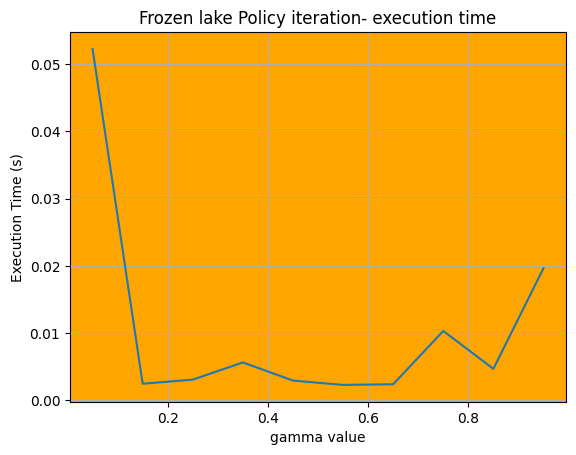

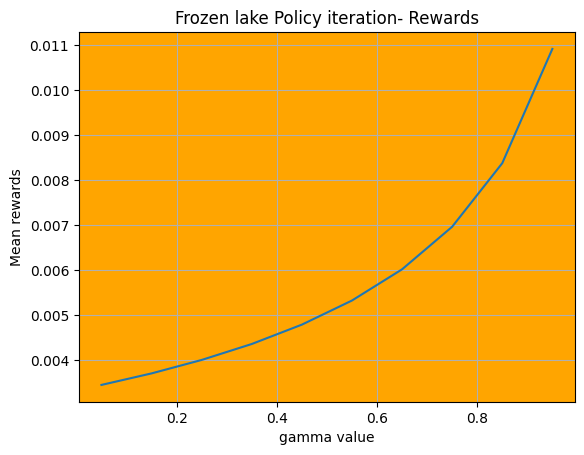

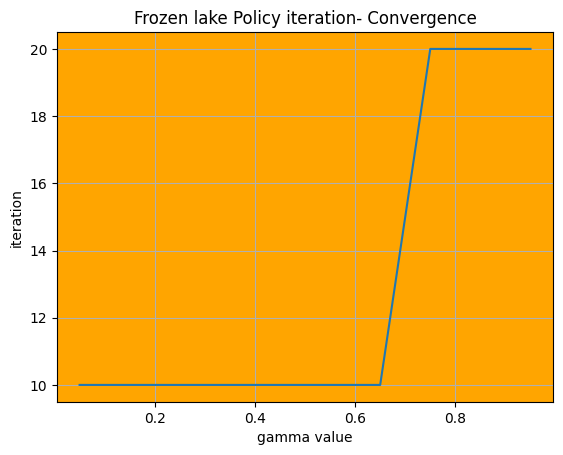

In [9]:

plot_data(gamma_arr, time_array, xlabel='gamma value', title='Frozen lake Policy iteration- execution time',
          ylabel='Execution Time (s)')

plot_data(gamma_arr, value_f, xlabel='gamma value', title='Frozen lake Policy iteration- Rewards',
          ylabel='Mean rewards')

plot_data(gamma_arr, iters, xlabel='gamma value', title='Frozen lake Policy iteration- Convergence',
          ylabel='iteration')


In [10]:
random_map = generate_random_map(size=10, p=0.60)
env = mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", desc=random_map, render=False)
P = env.P
R = env.R



value_f = [0]*10
policy = [0]*10
iters = [0]*10
time_array = [0]*10
gamma_arr = [0] * 10
for i in range(0,10):
    pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.5)/10, max_iter=1000)
    pi.run()
    value_f[i] = np.mean(pi.V)
    gamma_arr[i]=(i+0.5)/10
    time_array[i] = pi.time
    policy[i] = pi.policy
    iters[i] = pi.iter



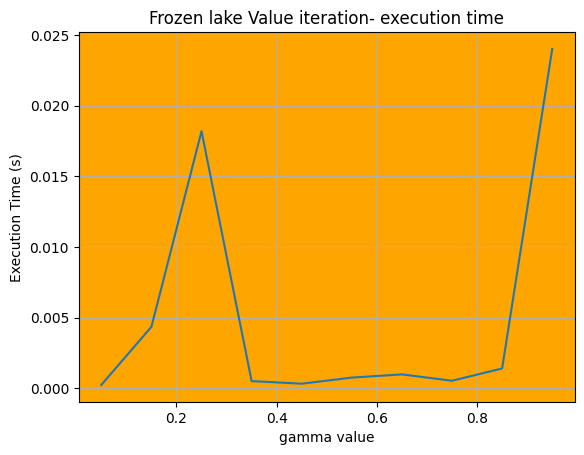

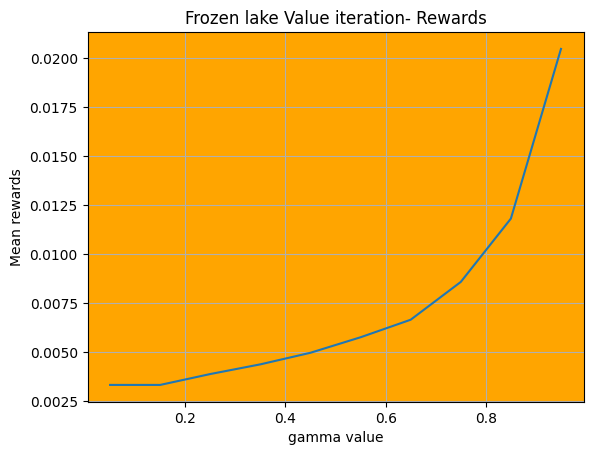

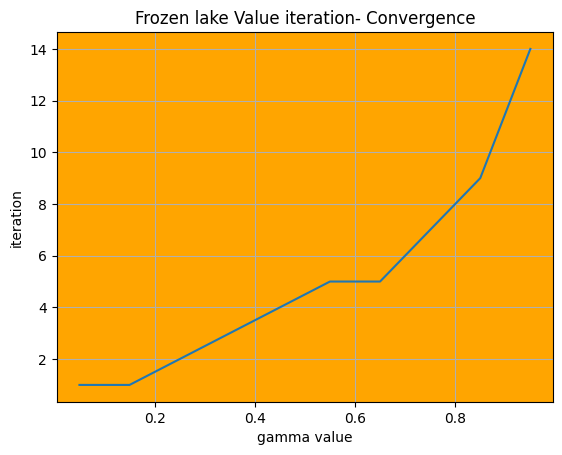

In [11]:

plot_data(gamma_arr, time_array, xlabel='gamma value', title='Frozen lake Value iteration- execution time',
          ylabel='Execution Time (s)')

plot_data(gamma_arr, value_f, xlabel='gamma value', title='Frozen lake Value iteration- Rewards',
          ylabel='Mean rewards')

plot_data(gamma_arr, iters, xlabel='gamma value', title='Frozen lake Value iteration- Convergence',
          ylabel='iteration')



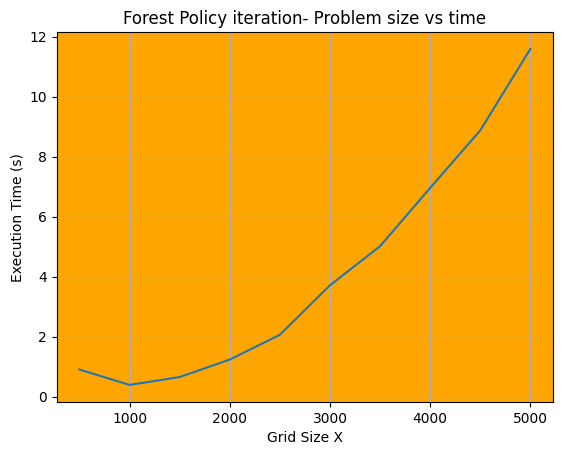

In [12]:
### FOREST


### value iteration

P, R = mdptoolbox.example.forest(S=2000)



value_f = [0]*10
policy = [0]*10
iters = [0]*10
time_array = [0]*10
gamma_arr = [0] * 10

for i in range(0,10):
    problem_size = (i+1)*500

    P, R = mdptoolbox.example.forest(S=problem_size)

    pi = mdptoolbox.mdp.PolicyIteration(P, R, (9.5)/10)
    pi.run()
    gamma_arr[i]=problem_size
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time

plot_data(gamma_arr, time_array, xlabel='Grid Size X', title='Forest Policy iteration- Problem size vs time',
          ylabel='Execution Time (s)')



In [13]:
P, R = mdptoolbox.example.forest(S=2000)

value_f = [0] * 10
policy = [0] * 10
iters = [0] * 10
time_array = [0] * 10
gamma_arr = [0] * 10
for i in range(0, 10):
    pi = mdptoolbox.mdp.PolicyIteration(P, R, (i + 0.5) / 10, max_iter=100)
    pi.run()
    value_f[i] = np.mean(pi.V)
    gamma_arr[i] = (i + 0.5) / 10
    time_array[i] = pi.time
    policy[i] = pi.policy
    iters[i] = pi.iter




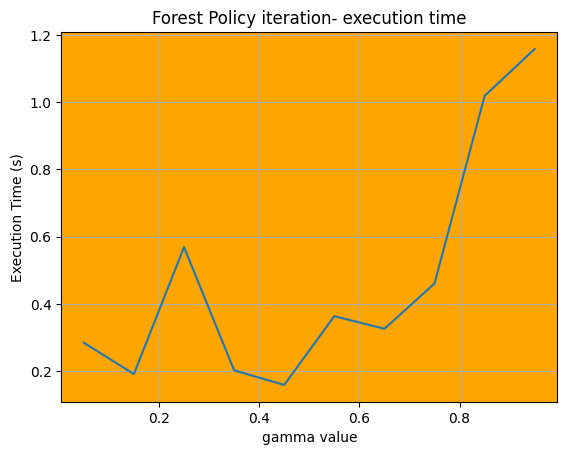

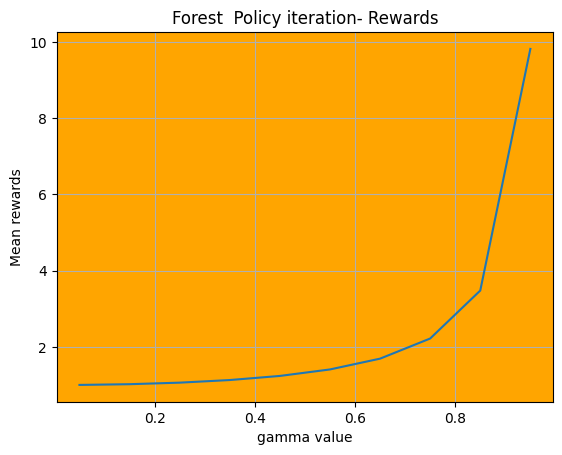

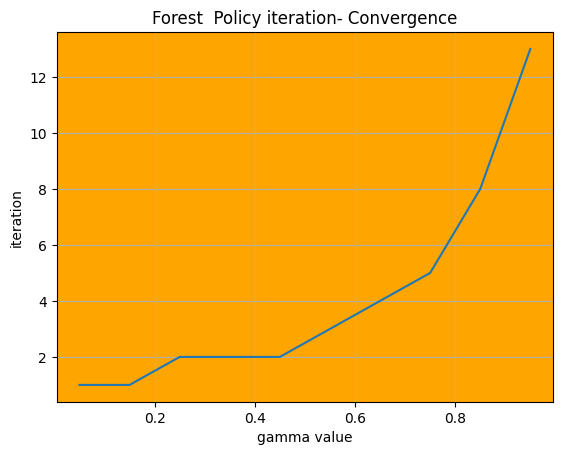

In [14]:

plot_data(gamma_arr, time_array, xlabel='gamma value', title='Forest Policy iteration- execution time',
          ylabel='Execution Time (s)')

plot_data(gamma_arr, value_f, xlabel='gamma value', title='Forest  Policy iteration- Rewards',
          ylabel='Mean rewards')

plot_data(gamma_arr, iters, xlabel='gamma value', title='Forest  Policy iteration- Convergence',
          ylabel='iteration')

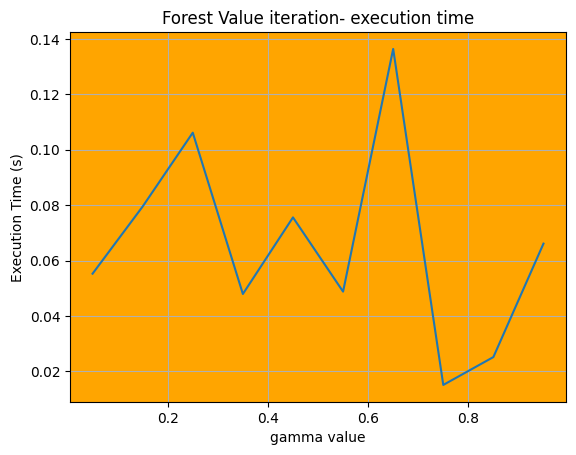

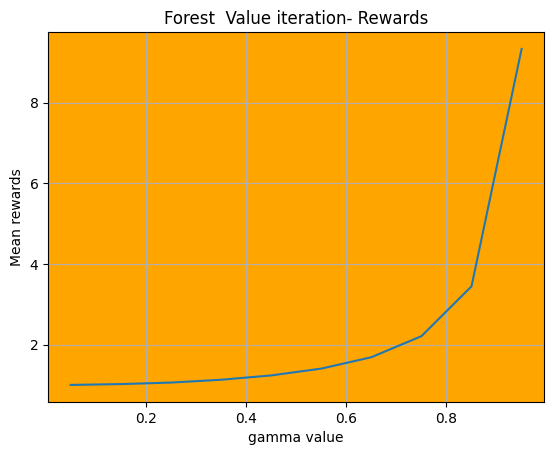

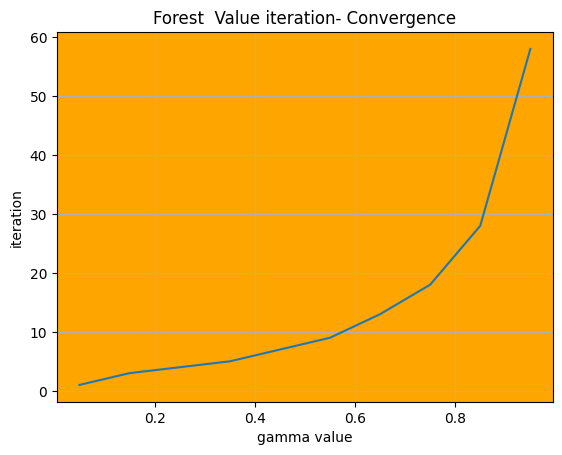

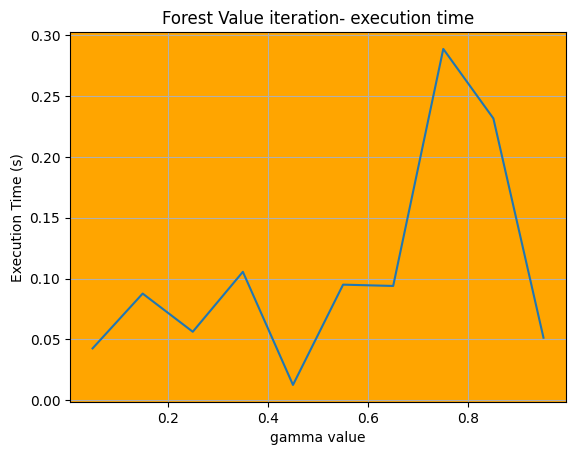

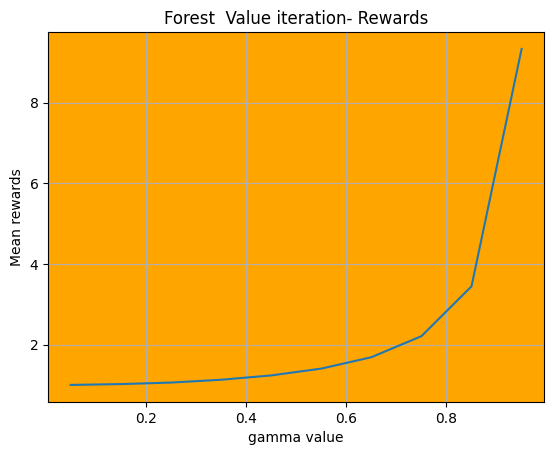

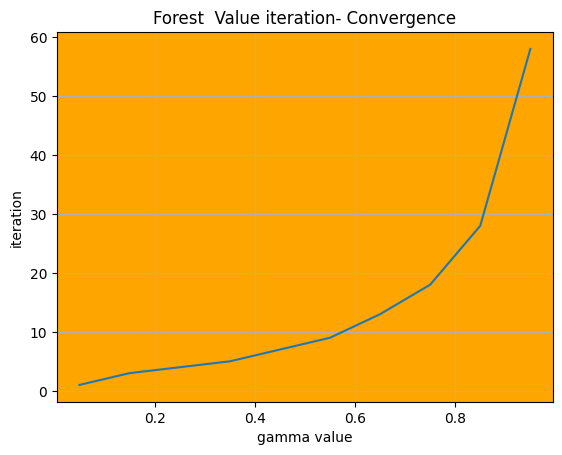

In [16]:
P, R = mdptoolbox.example.forest(S=2000)

value_f = [0] * 10
policy = [0] * 10
iters = [0] * 10
time_array = [0] * 10
gamma_arr = [0] * 10
for i in range(0, 10):
    pi = mdptoolbox.mdp.ValueIteration(P, R, (i + 0.5) / 10, max_iter=100)
    pi.run()
    value_f[i] = np.mean(pi.V)
    gamma_arr[i] = (i + 0.5) / 10
    time_array[i] = pi.time
    policy[i] = pi.policy
    iters[i] = pi.iter

plot_data(gamma_arr, time_array, xlabel='gamma value', title='Forest Value iteration- execution time',
          ylabel='Execution Time (s)')

plot_data(gamma_arr, value_f, xlabel='gamma value', title='Forest  Value iteration- Rewards',
          ylabel='Mean rewards')

plot_data(gamma_arr, iters, xlabel='gamma value', title='Forest  Value iteration- Convergence',
          ylabel='iteration')



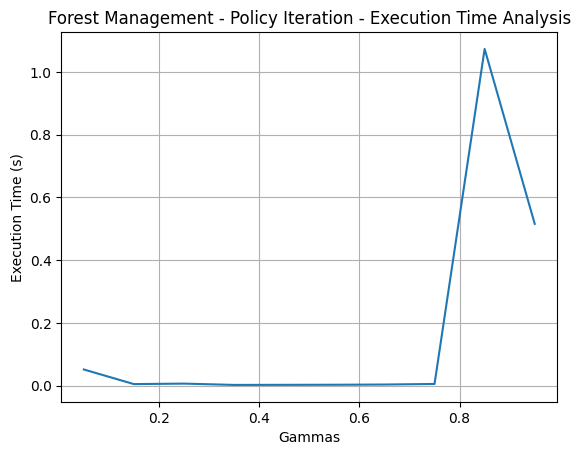

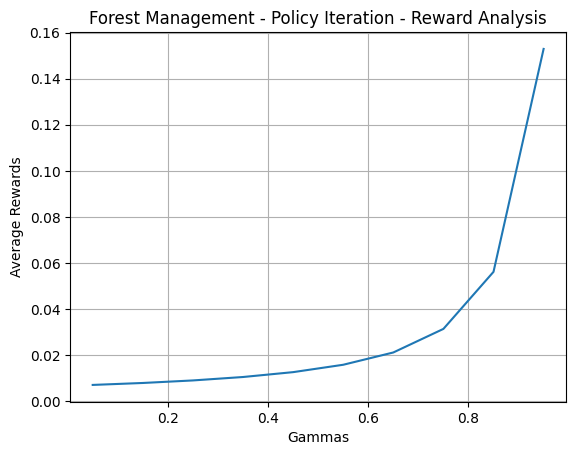

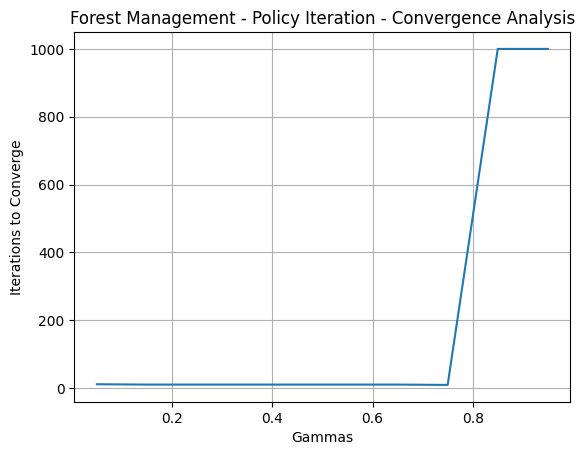

In [194]:
import time
P, R = mdptoolbox.example.forest(S=2000, p=0.01)
value_f = []
policy = []
iters = []
time_array = []
Q_table = []
rew_array = []
for epsilon in [0.05, 0.15, 0.25, 0.5, 0.75, 0.95]:
    st = time.time()
    pi = mdptoolbox.mdp.QLearning(P, R, gamma=0.95, epsilon=epsilon)
    end = time.time()
    pi.run()

    rew_array.append(pi.R)
    value_f.append(np.mean(pi.V))
    policy.append(pi.policy)
    time_array.append(end - st)
    Q_table.append(pi.Q)




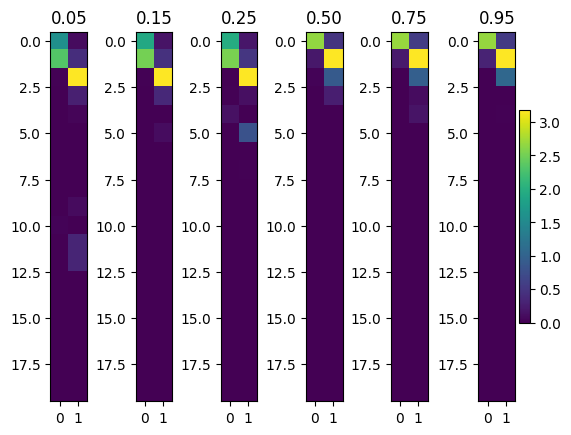

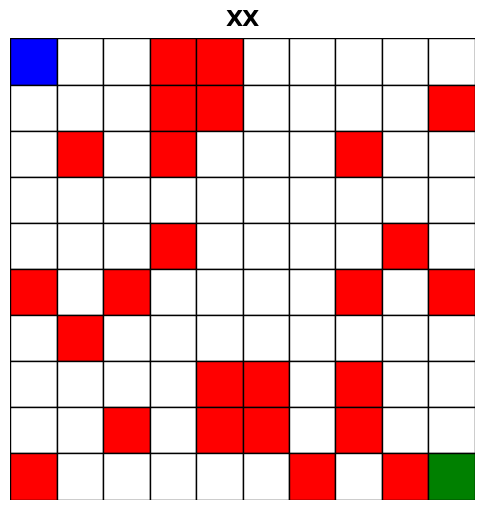